In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
# loading the data

data = pd.read_csv('customer_data.csv')
df = pd.DataFrame(data)

In [8]:
# reading the data
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             50 non-null     int64 
 1   Age                     50 non-null     int64 
 2   Gender                  50 non-null     object
 3   Annual Income (USD)     50 non-null     int64 
 4   Spending Score (1-100)  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


,Customer ID,Age,Annual Income (USD),Spending Score (1-100)
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,40.140000,80041.880000,49.540000
std,14.57738,13.278815,38839.754858,29.970877
min,1.00000,19.000000,22568.000000,1.000000
25%,13.25000,29.500000,51191.000000,28.000000
50%,25.50000,39.500000,76742.000000,46.000000
75%,37.75000,52.250000,107348.250000,76.500000
max,50.00000,64.000000,149312.000000,99.000000


In [9]:
# count of males & females in the data
df['Gender'].value_counts()

,count
Gender,
Female,34
Male,16


In [11]:
# analyze customer spending behavior

# 1. find the customer with highest spending score

hgh_spd_cus = df.loc[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()]
print(hgh_spd_cus)

   Customer ID  Age  Gender  Annual Income (USD)  Spending Score (1-100)
2            3   32  Female                59099                      99


In [14]:
# 2.Find the average spending score by gender
spd_scr_by_gdr = df.groupby('Gender')['Spending Score (1-100)'].mean()
print(spd_scr_by_gdr)

Gender
Female    50.117647
Male      48.312500
Name: Spending Score (1-100), dtype: float64


Income Group
Medium Income    23
High Income      15
Low Income       12
Name: count, dtype: int64
Income Group
Low Income       65.000000
Medium Income    45.608696
High Income      43.200000
Name: Spending Score (1-100), dtype: float64


<ipython-input-44-cf18ab0e7aea>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_income = df.groupby("Income Group")["Spending Score (1-100)"].mean()
<ipython-input-44-cf18ab0e7aea>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending_by_income.index, y=avg_spending_by_income.values, palette='Set2')


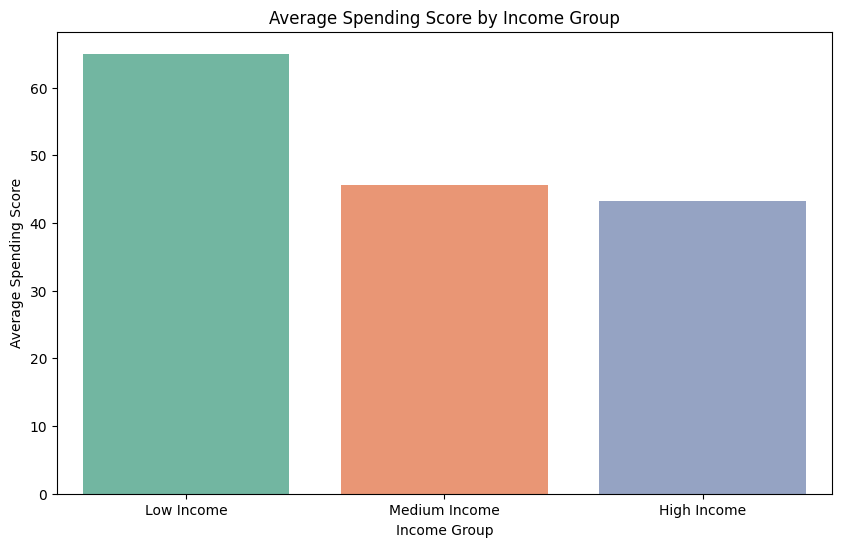

In [44]:
# 3. Find income groups (low, medium, high) and count customers in each
#  income groups
bins = [20000, 50000, 100000, 150000]  # Income ranges
labels = ["Low Income", "Medium Income", "High Income"]  # Labels for groups

# new column 'Income Group'
df["Income Group"] = pd.cut(df["Annual Income (USD)"], bins=bins, labels=labels)

# Count customers in each group
income_counts = df["Income Group"].value_counts()
print(income_counts)

# Calculate average spending score for each income group
avg_spending_by_income = df.groupby("Income Group")["Spending Score (1-100)"].mean()
print(avg_spending_by_income)

# chart for this
plt.figure(figsize=(10,6))
sns.barplot(x=avg_spending_by_income.index, y=avg_spending_by_income.values, palette='Set2')
plt.title('Average Spending Score by Income Group')
# download chart
plt.savefig('/content/charts')
plt.xlabel('Income Group')
plt.ylabel('Average Spending Score')
plt.show()


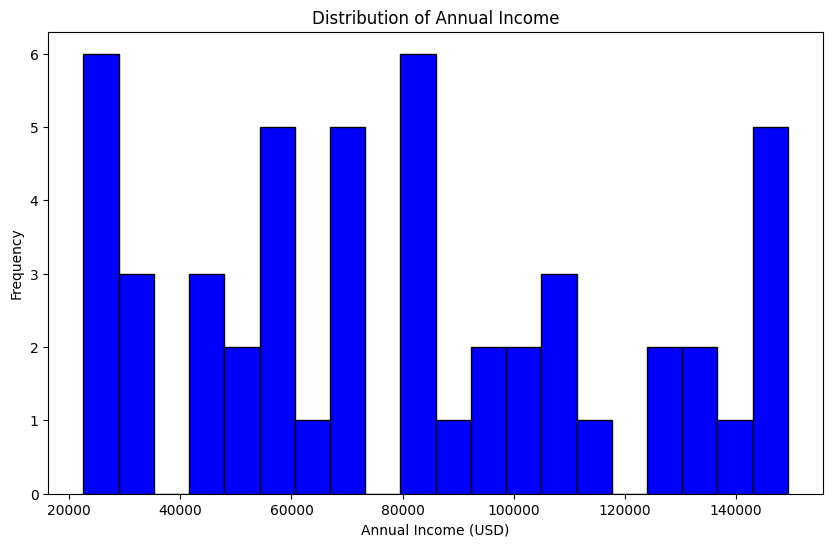

<Figure size 640x480 with 0 Axes>

In [40]:
# data visualization
# Distribution of annual income
plt.figure(figsize=(10,6))
plt.hist(df['Annual Income (USD)'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()
# dowload the chart with chart name
plt.savefig('/content/charts')


<ipython-input-43-c0903b22cd46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


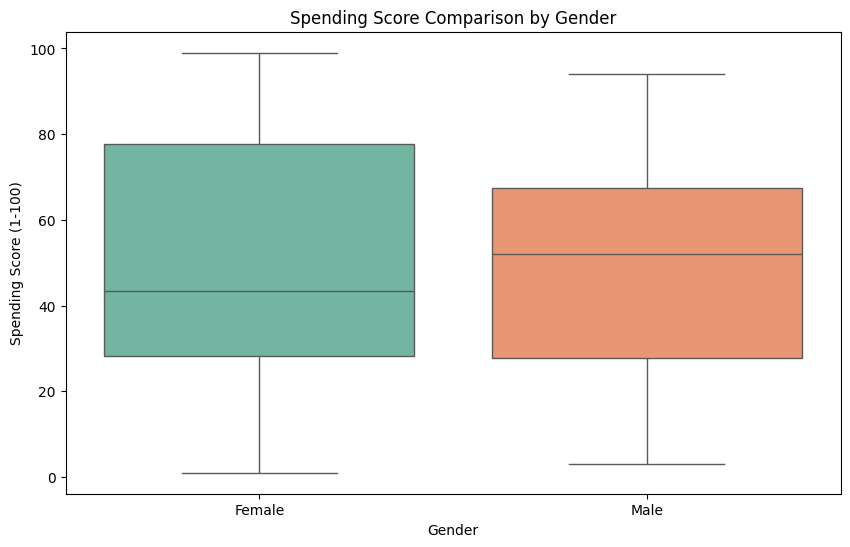

In [43]:
# Compare spending scores between males & females
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
# labeling
plt.title('Spending Score Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


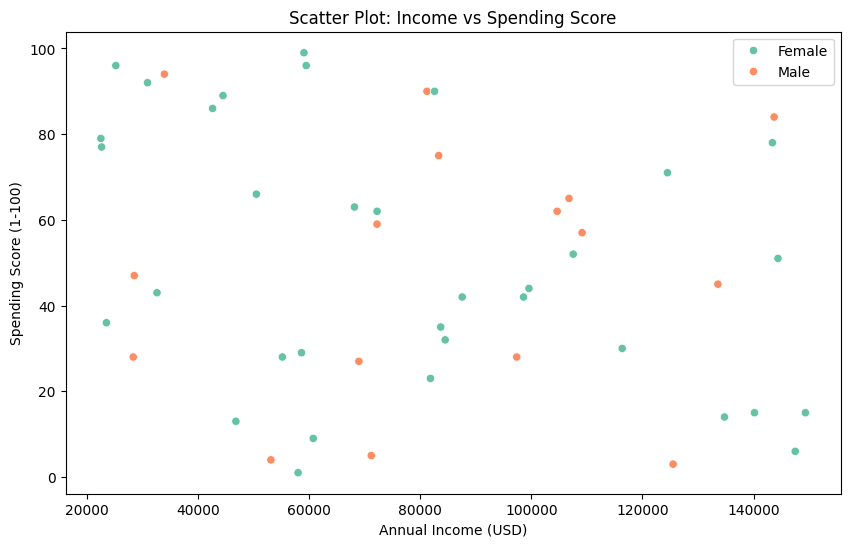

In [24]:
#  Scatter Plot → Relationship between income and spending score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (USD)', y='Spending Score (1-100)', data=df, hue='Gender', palette='Set2')
# labels
plt.title('Scatter Plot: Income vs Spending Score')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Age Group
Young (18-30)          41.461538
Middle-aged (31-50)    55.875000
Senior (51-65)         45.923077
Name: Spending Score (1-100), dtype: float64


<ipython-input-42-ffe9487edbd7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_age = df.groupby("Age Group")["Spending Score (1-100)"].mean()
<ipython-input-42-ffe9487edbd7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Set2')


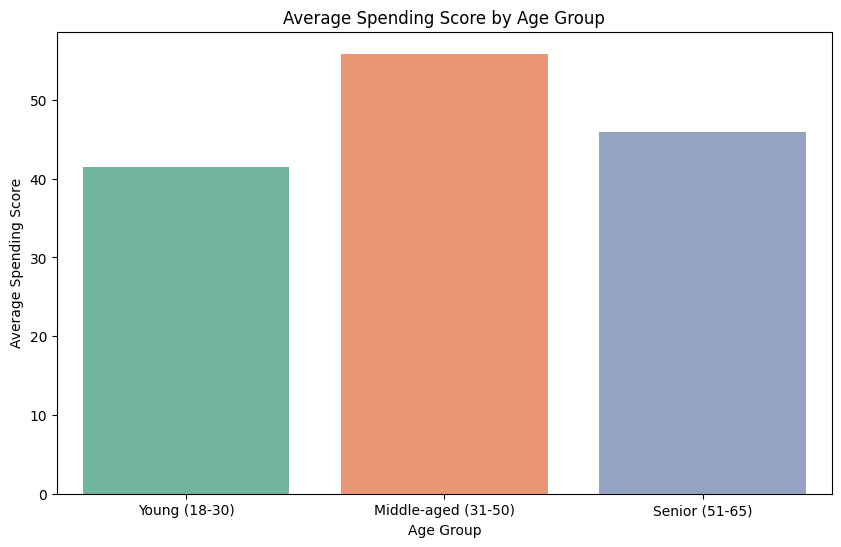

In [42]:
# Find Spending Score by Age Group
# Define age groups
age_bins = [18, 30, 50, 65]
age_labels = ["Young (18-30)", "Middle-aged (31-50)", "Senior (51-65)"]

# Create age group column
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# Find average spending score per age group
avg_spending_by_age = df.groupby("Age Group")["Spending Score (1-100)"].mean()
print(avg_spending_by_age)

# barcahrt for this
plt.figure(figsize=(10,6))
sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Set2')
plt.title('Average Spending Score by Age Group')
# labels
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.show()


downloading the charts